<a href="https://colab.research.google.com/github/mimahb/heart-disease-prediction/blob/main/heartdiseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2           

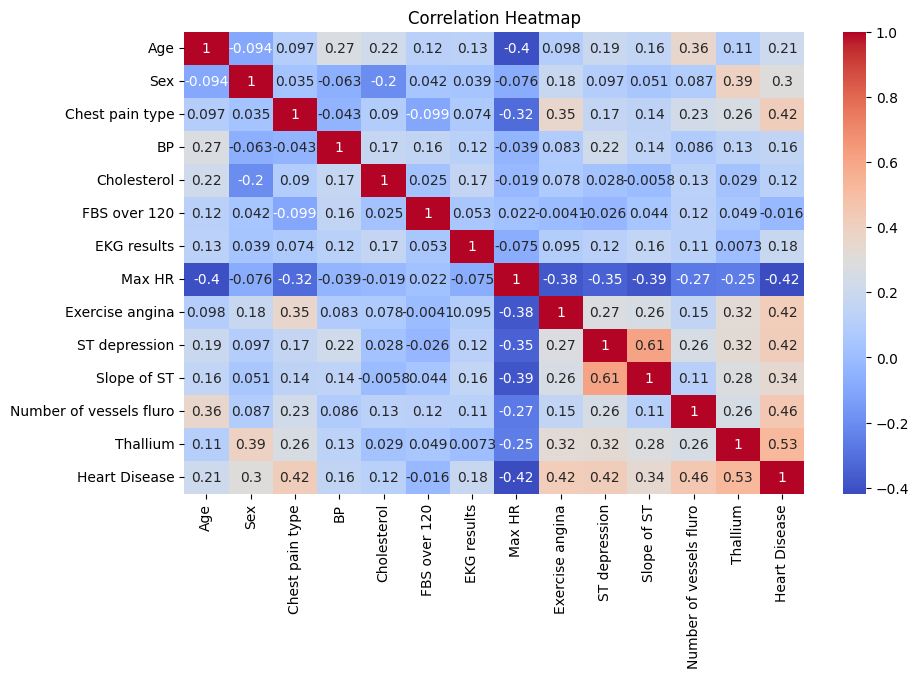

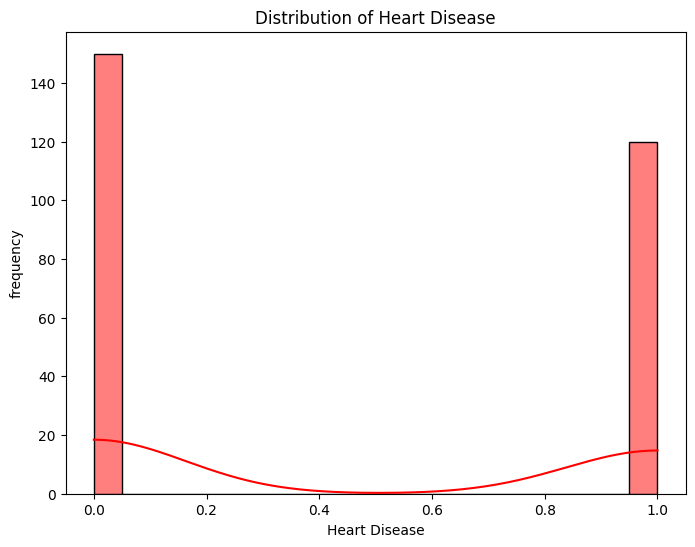

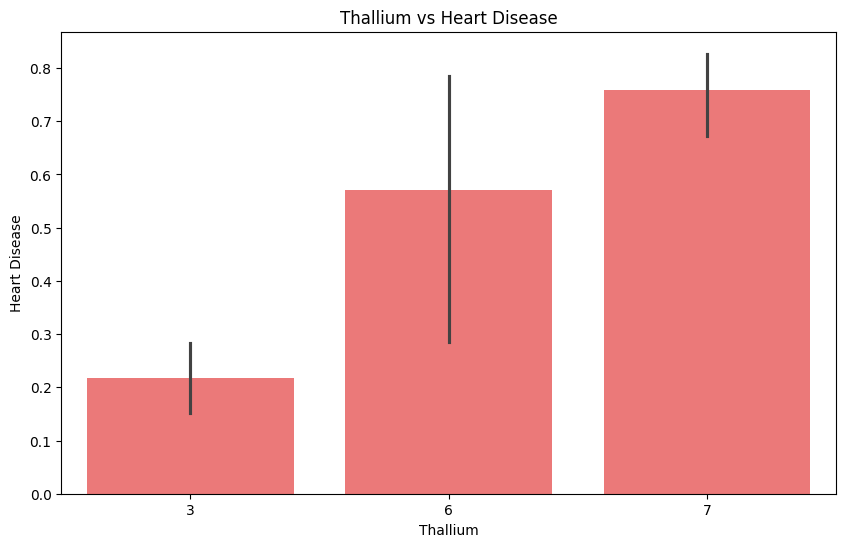

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54

Heart_Disease_Prediction.csv  sample_data


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


data = pd.read_csv('Heart_Disease_Prediction.csv')
print("Dataset Preview:")
print(data.head())

print("\n Dataset info:")
print(data.info())

print("\n Dataset Description:")
print(data.describe())

print("\n Null Values:")
print(data.isnull().sum()) # corrected line

data['Heart Disease'] = data['Heart Disease'].map({'Presence': 1, 'Absence': 0}) # corrected line
numerical_data = data.select_dtypes(include=np.number)

#correlation between the features and the target value
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#visualize the distribution of the target variable
plt.figure(figsize = (8, 6))
sns.histplot(data['Heart Disease'], kde = True, bins = 20, color = 'red')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('frequency')
plt.show()

# visualize thallium vs heart disease
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Thallium'], y=data['Heart Disease'], alpha=0.6, color='red')
plt.title('Thallium vs Heart Disease')
plt.xlabel('Thallium')
plt.ylabel('Heart Disease')
plt.show()

#data preprocessing
data = data.dropna()

#split data into features x and target y
x= data.drop(columns = 'Heart Disease', axis = 1)
y= data['Heart Disease']

#split data into training and testing 80/20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)


#scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

label_features = ["Sex", "FBS over 120", "Exercise angina", "Number of vessels fluro", "Heart Disease"]
for col in label_features:
    label = LabelEncoder()
    data[col] = label.fit_transform(data[col])

onehot_features = ["Chest pain type", "EKG results", "Slope of ST", "Thallium"]
df = pd.get_dummies(data, columns=onehot_features, drop_first=True)

#create model
model = LogisticRegression()
model.fit(x_train, y_train)


#make predictions
pred = model.predict(x_test)

#evaluate
accuracy = accuracy_score(y_test, pred)
classification_rep = classification_report(y_test, pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

!ls
